In [50]:
import numpy as np 
import pandas as pd 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
import warnings
import pickle
from scipy import stats
warnings.filterwarnings('ignore')
plt.style.use('fivethirtyeight')

In [51]:
df = pd.read_csv('C:/Users/Dasi Rajesh/Downloads/archive (1)/test.csv')
df.head()

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Class,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,...,Inflight entertainment,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction
0,0,19556,Female,Loyal Customer,52,Business travel,Eco,160,5,4,...,5,5,5,5,2,5,5,50,44.0,satisfied
1,1,90035,Female,Loyal Customer,36,Business travel,Business,2863,1,1,...,4,4,4,4,3,4,5,0,0.0,satisfied
2,2,12360,Male,disloyal Customer,20,Business travel,Eco,192,2,0,...,2,4,1,3,2,2,2,0,0.0,neutral or dissatisfied
3,3,77959,Male,Loyal Customer,44,Business travel,Business,3377,0,0,...,1,1,1,1,3,1,4,0,6.0,satisfied
4,4,36875,Female,Loyal Customer,49,Business travel,Eco,1182,2,3,...,2,2,2,2,4,2,4,0,20.0,satisfied


In [52]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25976 entries, 0 to 25975
Data columns (total 25 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   Unnamed: 0                         25976 non-null  int64  
 1   id                                 25976 non-null  int64  
 2   Gender                             25976 non-null  object 
 3   Customer Type                      25976 non-null  object 
 4   Age                                25976 non-null  int64  
 5   Type of Travel                     25976 non-null  object 
 6   Class                              25976 non-null  object 
 7   Flight Distance                    25976 non-null  int64  
 8   Inflight wifi service              25976 non-null  int64  
 9   Departure/Arrival time convenient  25976 non-null  int64  
 10  Ease of Online booking             25976 non-null  int64  
 11  Gate location                      25976 non-null  int

In [53]:
df.isnull().sum()

Unnamed: 0                            0
id                                    0
Gender                                0
Customer Type                         0
Age                                   0
Type of Travel                        0
Class                                 0
Flight Distance                       0
Inflight wifi service                 0
Departure/Arrival time convenient     0
Ease of Online booking                0
Gate location                         0
Food and drink                        0
Online boarding                       0
Seat comfort                          0
Inflight entertainment                0
On-board service                      0
Leg room service                      0
Baggage handling                      0
Checkin service                       0
Inflight service                      0
Cleanliness                           0
Departure Delay in Minutes            0
Arrival Delay in Minutes             83
satisfaction                          0


In [54]:
df['Gender'].unique()

array(['Female', 'Male'], dtype=object)

In [55]:
df['Customer Type'].unique()

array(['Loyal Customer', 'disloyal Customer'], dtype=object)

In [56]:
df['Type of Travel'].unique()

array(['Business travel', 'Personal Travel'], dtype=object)

In [57]:
df['Class'].unique()

array(['Eco', 'Business', 'Eco Plus'], dtype=object)

In [58]:
df['satisfaction'].unique()

array(['satisfied', 'neutral or dissatisfied'], dtype=object)

In [59]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()

df[ 'Gender'] = le.fit_transform(df['Gender'])

df['Customer Type'] = le.fit_transform(df[ 'Customer Type'])

df[ 'Type of Travel'] = le.fit_transform(df[ 'Type of Travel'])

df['class'] = le.fit_transform(df['Class'])

df[ 'satisfaction'] = le.fit_transform(df[ 'satisfaction'])

In [60]:
quant = df.quantile(q = [0.25,0.75],axis = 0)
quant

,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class
0.25,6493.75,32170.50,0.0,0.0,27.0,0.0,414.0,2.0,2.0,2.0,...,2.0,2.0,3.0,3.0,3.0,2.0,0.0,0.0,0.0,0.0
0.75,19481.25,97584.25,1.0,0.0,51.0,1.0,1744.0,4.0,4.0,4.0,...,4.0,4.0,5.0,4.0,5.0,4.0,12.0,13.0,1.0,1.0


In [61]:
df ['Customer Type'] = np.where(df['Customer Type']>0.1,0, df['Customer Type'])
df ['Customer Type'] = np.where(df['Customer Type']<0,0,df['Customer Type'])

df ['Flight Distance'] = np.where(df['Flight Distance']>3700, 1744,df['Flight Distance']) 
df['Flight Distance']=np.where(df['Flight Distance']<0,414,df["Flight Distance"])

df['Checkin service'] = np.where(df['Checkin service']>4.9,4.0, df['Checkin service'])
df['Checkin service'] = np.where(df['Checkin service']<2,3.0,df['Checkin service'])

df['Departure Delay in Minutes']=np.where(df['Departure Delay in Minutes']>10,12, df['Departure Delay in Minutes']) 
df['Departure Delay in Minutes'] =np.where(df['Departure Delay in Minutes']<0,3.0,df['Departure Delay in Minutes'])

df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes']>10,13, df['Arrival Delay in Minutes']) 
df['Arrival Delay in Minutes'] = np.where(df['Arrival Delay in Minutes']< 0,3.0,df['Arrival Delay in Minutes'])

In [62]:
df.describe()


,Unnamed: 0,id,Gender,Customer Type,Age,Type of Travel,Flight Distance,Inflight wifi service,Departure/Arrival time convenient,Ease of Online booking,...,On-board service,Leg room service,Baggage handling,Checkin service,Inflight service,Cleanliness,Departure Delay in Minutes,Arrival Delay in Minutes,satisfaction,class
count,25976.000000,25976.000000,25976.000000,25976.0,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,...,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25976.000000,25893.000000,25976.000000,25976.000000
mean,12987.500000,65005.657992,0.492917,0.0,39.620958,0.305590,1139.209386,2.724746,3.046812,2.756775,...,3.385664,3.350169,3.633238,3.359293,3.649253,3.286226,3.977248,4.389101,0.438982,0.592778
std,7498.769632,37611.526647,0.499959,0.0,15.135685,0.460666,903.981285,1.335384,1.533371,1.412951,...,1.282088,1.318862,1.176525,0.690865,1.180681,1.319330,5.245509,5.724003,0.496272,0.623703
min,0.000000,17.000000,0.000000,0.0,7.000000,0.000000,31.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,6493.750000,32170.500000,0.000000,0.0,27.000000,0.000000,414.000000,2.000000,2.000000,2.000000,...,2.000000,2.000000,3.000000,3.000000,3.000000,2.000000,0.000000,0.000000,0.000000,0.000000
50%,12987.500000,65319.500000,0.000000,0.0,40.000000,0.000000,849.000000,3.000000,3.000000,3.000000,...,4.000000,4.000000,4.000000,3.000000,4.000000,3.000000,0.000000,0.000000,0.000000,1.000000
75%,19481.250000,97584.250000,1.000000,0.0,51.000000,1.000000,1744.000000,4.000000,4.000000,4.000000,...,4.000000,4.000000,5.000000,4.000000,5.000000,4.000000,12.000000,13.000000,1.000000,1.000000
max,25975.000000,129877.000000,1.000000,0.0,85.000000,1.000000,3700.000000,5.000000,5.000000,5.000000,...,5.000000,5.000000,5.000000,4.000000,5.000000,5.000000,12.000000,13.000000,1.000000,2.000000


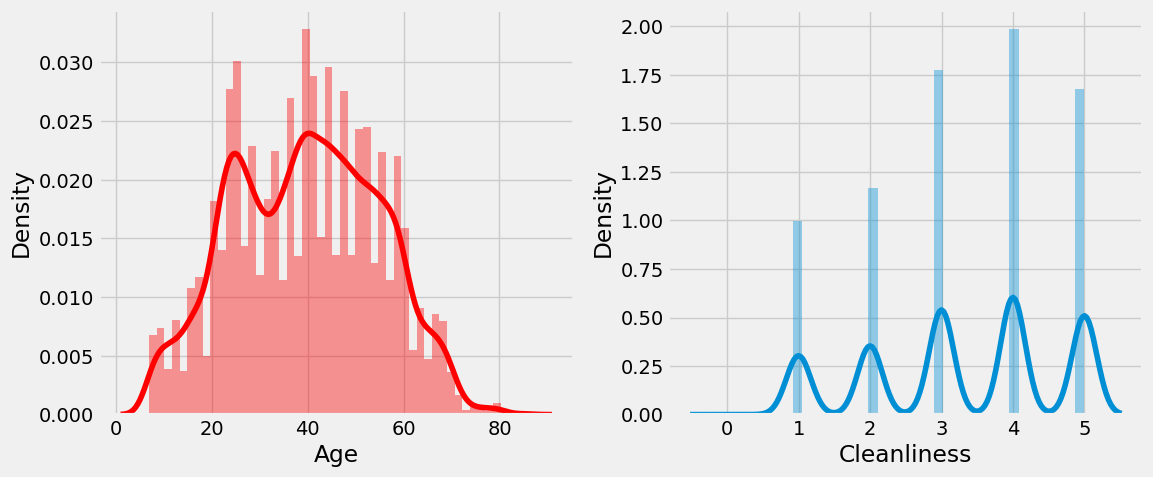

In [63]:
plt.figure(figsize=(12,5))
plt.subplot(121)
sns.distplot(df['Age'],color='r')
plt.subplot(122)
sns.distplot(df['Cleanliness'])
plt.show()

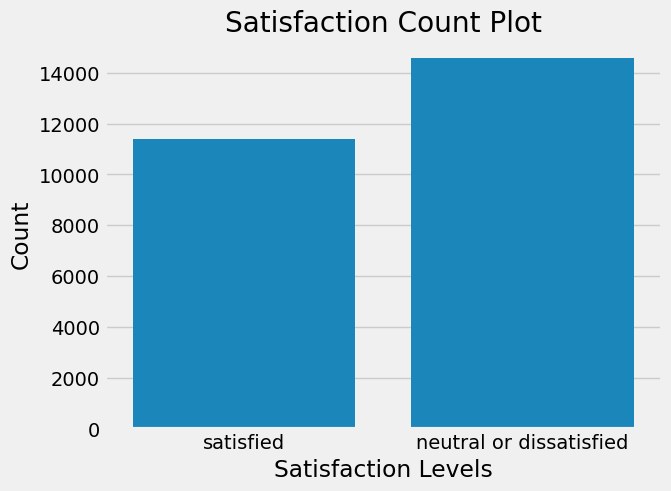

In [64]:
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd

# Load your dataset into a DataFrame (replace 'your_data.csv' with the actual data file)
df = pd.read_csv('C:/Users/Dasi Rajesh/Downloads/archive (1)/test.csv')

# Assuming the 'satisfaction' column exists in your DataFrame
sns.countplot(data=df, x='satisfaction')
plt.title('Satisfaction Count Plot')
plt.xlabel('Satisfaction Levels')
plt.ylabel('Count')
plt.show()


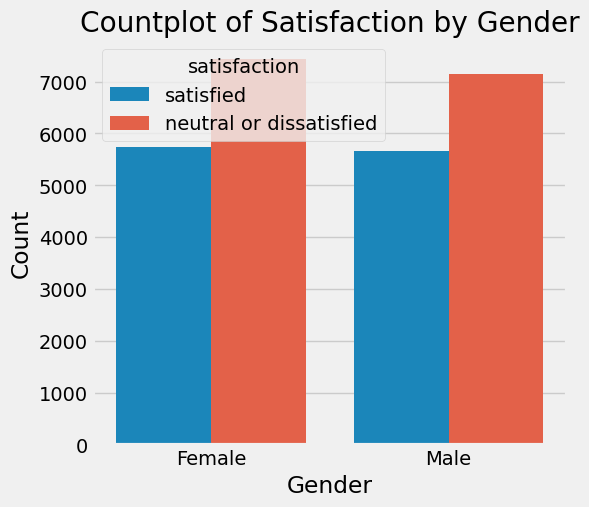

In [65]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'df' is your DataFrame
# Make sure to load your data into the 'df' DataFrame before running this code

plt.figure(figsize=(12, 5))

# Create a subplot with 1 row and 2 columns (1x2 grid)
plt.subplot(121)

# Create a countplot of 'satisfaction' based on 'Gender' with a hue
sns.countplot(x='Gender', hue='satisfaction', data=df)

# You may also want to set labels for the axes and a title
plt.xlabel('Gender')
plt.ylabel('Count')
plt.title('Countplot of Satisfaction by Gender')

plt.show()


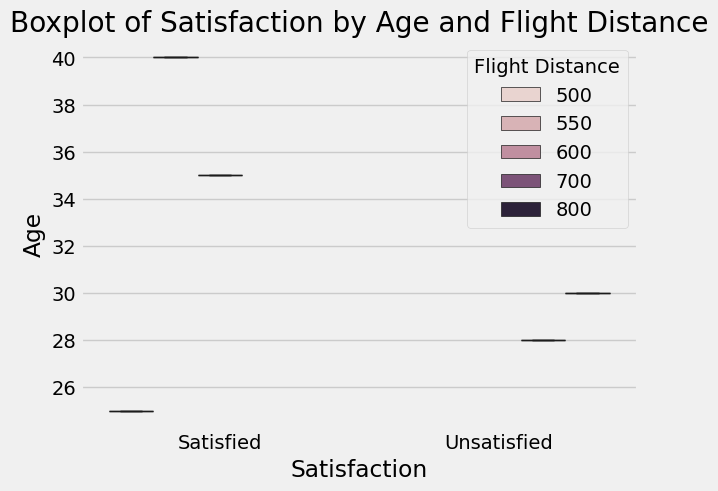

In [66]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Create a DataFrame (Replace this with your data loading)
data = {
    'satisfaction': ['Satisfied', 'Unsatisfied', 'Satisfied', 'Unsatisfied', 'Satisfied'],
    'Age': [25, 30, 35, 28, 40],
    'Flight Distance': [500, 800, 600, 700, 550]
}
df = pd.DataFrame(data)

# Create a boxplot
sns.boxplot(data=df, x='satisfaction', y='Age', hue='Flight Distance')

# Customize the plot if needed
plt.title("Boxplot of Satisfaction by Age and Flight Distance")
plt.xlabel("Satisfaction")
plt.ylabel("Age")
plt.legend(title="Flight Distance")

# Show the plot
plt.show()


In [67]:
import pandas as pd
from sklearn.model_selection import train_test_split

# Load your dataset into a DataFrame (assuming it's named 'data')
# Replace 'data.csv' with the path to your dataset file
df = pd.read_csv('C:/Users/Dasi Rajesh/Downloads/archive (1)/test.csv')

# Separate the input features (X) and the target variable (y)
X = df.iloc[:, :-1]
y = df.iloc[:, -1]

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Check the shapes of the training and testing sets
print("X_train shape:", X_train.shape)
print("y_train shape:", y_train.shape)
print("X_test shape:", X_test.shape)
print("y_test shape:", y_test.shape)


X_train shape: (20780, 24)
y_train shape: (20780,)
X_test shape: (5196, 24)
y_test shape: (5196,)


In [68]:
#Decission Tree

def dt (X_train,y_train,X_test,y_test):
    reg3 = DecisionTreeClassifier(criterion="entropy")
    reg3.fit(X_train,y_train)
    print('accuracy')
    print('Training accuracy= ', reg3.score(X_train,y_train))
    print('test accuracy=', reg3.score(X_test,y_test))
    y_test_pred = reg3.predict(X_test)
    print('Test data confusion matrix: ',confusion_matrix(y_test,y_test_pred))
    print('test data classification report:', classification_report(y_test,y_test_pred))

In [69]:
# Random Forest

def RF(X_train , y_train , X_test, y_test):
    reg4 = RandomForestClassifier()
    reg4.fit(X_train, y_train)
    print('Accuracy:')
    print('Training accuracy = ',reg4.score(X_train,y_train))
    print('Test accuracy = ',reg4.score(X_test,y_test))
    y_test_pred = reg4.predict(X_test)
    print('Test data confusion_matrix : ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification_report: ', classification_report(y_test,y_test_pred))

In [70]:
#KNN

def knn(X_train, y_train,X_test, y_test):
    reg = KNeighborsClassifier(n_neighbors=5)
    reg.fit(X_train, y_train)
    print('Accuracy:')
    print('Training accuracy = ',reg.score (X_train,y_train))
    print('Test accuracy = ',reg.score(X_test, y_test)) 
    y_test_pred=reg.predict(X_test)
    print('Test data confusion_matrix: ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification_report: ',classification_report(y_test,y_test_pred))

In [71]:
#Logistic Regression

from sklearn.linear_model import LogisticRegression


def lg(X_train,y_train,X_test,y_test):
    regl = LogisticRegression()
    regl.fit(X_train,y_train)
    print('accuracy')
    print('Training accuracy=', regl.score(X_train,y_train)) 
    print('test accuracy=', regl. score(X_test,y_test))
    y_test_pred = regl.predict(X_test)
    print('Test data confusion matrix: ',confusion_matrix(y_test,y_test_pred))
    print('Test data classification report: ',confusion_matrix(y_test,y_test_pred))

In [72]:
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix, classification_report
from sklearn.impute import SimpleImputer

# Load your dataset
data = pd.read_csv("C:/Users/Dasi Rajesh/Downloads/archive (1)/test.csv")

# Extract the target column
y = data["satisfaction"]

# Remove the target column from the dataset
X = data.drop(columns=["satisfaction"])

# Perform one-hot encoding for categorical columns
X = pd.get_dummies(X, columns=["Gender", "Customer Type", "Type of Travel", "Class"])

# Impute missing values (replace NaNs with the mean value)
imputer = SimpleImputer()
X = imputer.fit_transform(X)

# Split the dataset into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Function to evaluate a model
def evaluate_model(model, X_train, y_train, X_test, y_test, model_name):
    model.fit(X_train, y_train)
    print(f"------------*------{model_name}-----*-----------")
    print("Accuracy:")
    training_accuracy = model.score(X_train, y_train)
    test_accuracy = model.score(X_test, y_test)
    print(f"Training accuracy= {training_accuracy}")
    print(f"Test accuracy= {test_accuracy}")
    y_test_pred = model.predict(X_test)
    print("Test data confusion matrix:")
    print(confusion_matrix(y_test, y_test_pred))
    print("Test data classification report:")
    print(classification_report(y_test, y_test_pred))

# Call the evaluate_model function for each model
dt_model = DecisionTreeClassifier(criterion="entropy")
evaluate_model(dt_model, X_train, y_train, X_test, y_test, "Decision Tree")







------------*------Decision Tree-----*-----------
Accuracy:
Training accuracy= 1.0
Test accuracy= 0.9362971516551193
Test data confusion matrix:
[[2772  173]
 [ 158 2093]]
Test data classification report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.94      0.94      2945
              satisfied       0.92      0.93      0.93      2251

               accuracy                           0.94      5196
              macro avg       0.93      0.94      0.94      5196
           weighted avg       0.94      0.94      0.94      5196



In [73]:

rf_model = RandomForestClassifier()
evaluate_model(rf_model, X_train, y_train, X_test, y_test, "Random Forest")

------------*------Random Forest-----*-----------
Accuracy:
Training accuracy= 1.0
Test accuracy= 0.9545804464973057
Test data confusion matrix:
[[2849   96]
 [ 140 2111]]
Test data classification report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.95      0.97      0.96      2945
              satisfied       0.96      0.94      0.95      2251

               accuracy                           0.95      5196
              macro avg       0.95      0.95      0.95      5196
           weighted avg       0.95      0.95      0.95      5196



In [74]:
knn_model = KNeighborsClassifier(n_neighbors=5)
evaluate_model(knn_model, X_train, y_train, X_test, y_test, "KNN")

------------*------KNN-----*-----------
Accuracy:
Training accuracy= 0.7296438883541867
Test accuracy= 0.5962278675904542
Test data confusion matrix:
[[2084  861]
 [1237 1014]]
Test data classification report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.63      0.71      0.67      2945
              satisfied       0.54      0.45      0.49      2251

               accuracy                           0.60      5196
              macro avg       0.58      0.58      0.58      5196
           weighted avg       0.59      0.60      0.59      5196



In [75]:
lg_model = LogisticRegression()
evaluate_model(lg_model, X_train, y_train, X_test, y_test, "Logistic Regression")

------------*------Logistic Regression-----*-----------
Accuracy:
Training accuracy= 0.6826275264677575
Test accuracy= 0.6855273287143957
Test data confusion matrix:
[[2033  912]
 [ 722 1529]]
Test data classification report:
                         precision    recall  f1-score   support

neutral or dissatisfied       0.74      0.69      0.71      2945
              satisfied       0.63      0.68      0.65      2251

               accuracy                           0.69      5196
              macro avg       0.68      0.68      0.68      5196
           weighted avg       0.69      0.69      0.69      5196



In [76]:
# Display the first few rows of the dataset
print(data.head())


   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   52  Business travel   
1           1  90035  Female     Loyal Customer   36  Business travel   
2           2  12360    Male  disloyal Customer   20  Business travel   
3           3  77959    Male     Loyal Customer   44  Business travel   
4           4  36875  Female     Loyal Customer   49  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco              160                      5   
1  Business             2863                      1   
2       Eco              192                      2   
3  Business             3377                      0   
4       Eco             1182                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

In [77]:
# List all column names
print(data.columns)


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [78]:
from sklearn import preprocessing
le=preprocessing.LabelEncoder()
clm=['satisfaction', 'Age', 'Flight Distance']
for x in clm:
    df[x]=le.fit_transform(df[x])

In [79]:
print(df.columns)


Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [80]:
print(df.head())


   Unnamed: 0     id  Gender      Customer Type  Age   Type of Travel  \
0           0  19556  Female     Loyal Customer   45  Business travel   
1           1  90035  Female     Loyal Customer   29  Business travel   
2           2  12360    Male  disloyal Customer   13  Business travel   
3           3  77959    Male     Loyal Customer   37  Business travel   
4           4  36875  Female     Loyal Customer   42  Business travel   

      Class  Flight Distance  Inflight wifi service  \
0       Eco               70                      5   
1  Business             2300                      1   
2       Eco               95                      2   
3  Business             2740                      0   
4       Eco              926                      2   

   Departure/Arrival time convenient  ...  Inflight entertainment  \
0                                  4  ...                       5   
1                                  1  ...                       4   
2                      

In [81]:
print(df.dtypes)


Unnamed: 0                             int64
id                                     int64
Gender                                object
Customer Type                         object
Age                                    int64
Type of Travel                        object
Class                                 object
Flight Distance                        int64
Inflight wifi service                  int64
Departure/Arrival time convenient      int64
Ease of Online booking                 int64
Gate location                          int64
Food and drink                         int64
Online boarding                        int64
Seat comfort                           int64
Inflight entertainment                 int64
On-board service                       int64
Leg room service                       int64
Baggage handling                       int64
Checkin service                        int64
Inflight service                       int64
Cleanliness                            int64
Departure 

In [82]:
print(df.columns)

Index(['Unnamed: 0', 'id', 'Gender', 'Customer Type', 'Age', 'Type of Travel',
       'Class', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'satisfaction'],
      dtype='object')


In [83]:
import pandas as pd
from sklearn.preprocessing import StandardScaler

# Load your DataFrame (replace 'your_data.csv' with the actual data source)
df = pd.read_csv('C:/Users/Dasi Rajesh/Downloads/archive (1)/test.csv')

# Select features and target variable
x = df[['Unnamed: 0', 'id', 'Age', 'Flight Distance', 'Inflight wifi service',
       'Departure/Arrival time convenient', 'Ease of Online booking',
       'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort',
       'Inflight entertainment', 'On-board service', 'Leg room service',
       'Baggage handling', 'Checkin service', 'Inflight service',
       'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes',
       'Gender', 'Customer Type', 'Type of Travel', 'Class']]

y = df['satisfaction']

# Handle categorical variables (one-hot encoding)
categorical_columns = ['Gender', 'Customer Type', 'Type of Travel', 'Class']
x = pd.get_dummies(x, columns=categorical_columns)

# Perform data scaling only on numeric columns
numeric_columns = ['Age', 'Flight Distance', 'Inflight wifi service', 'Departure/Arrival time convenient', 'Ease of Online booking', 'Gate location', 'Food and drink', 'Online boarding', 'Seat comfort', 'Inflight entertainment', 'On-board service', 'Leg room service', 'Baggage handling', 'Checkin service', 'Inflight service', 'Cleanliness', 'Departure Delay in Minutes', 'Arrival Delay in Minutes']
scaler = StandardScaler()
x[numeric_columns] = scaler.fit_transform(x[numeric_columns])

# Now, x contains the preprocessed and scaled features, and y contains the target variable.


In [84]:
from sklearn.model_selection import train_test_split
x_train , x_test , y_train , y_test = train_test_split(x,y , test_size= 0.25 , random_state=42)

In [85]:
x_train.shape

(19482, 29)

In [86]:
from sklearn.model_selection import GridSearchCV



In [87]:
from sklearn.ensemble import RandomForestClassifier
forest = RandomForestClassifier()

In [88]:
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini','entropy'],
    'max_depth': [14, 20, 25, 30]
}

In [89]:

import pandas as pd
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline

# Load your dataset (replace 'your_dataset.csv' with your dataset file)
df = pd.read_csv('C:/Users/Dasi Rajesh/Downloads/archive (1)/test.csv')

# Data preprocessing: One-hot encode categorical columns
df_encoded = pd.get_dummies(df, columns=['Gender', 'Customer Type', 'Type of Travel', 'Class'], drop_first=True)

# Separate features (X) and target variable (y)
X = df_encoded.drop('satisfaction', axis=1)
y = df_encoded['satisfaction']

# Impute missing values with the mean
imputer = SimpleImputer(strategy='mean')
X = imputer.fit_transform(X)

# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Create a RandomForestClassifier
forest = RandomForestClassifier(random_state=42)

# Define hyperparameters for tuning
parameters = {
    'n_estimators': [25, 50, 200, 300],
    'criterion': ['gini','entropy'],
    'max_depth': [14, 20, 25, 30]
}

# Create GridSearchCV object
grid_search = GridSearchCV(estimator=forest,
                           param_grid=parameters,
                           scoring='accuracy',
                           cv=10,  # Use lowercase 'cv' instead of 'CV'
                           n_jobs=-1)

# Fit the GridSearchCV to the training data
grid_search = grid_search.fit(X_train, y_train)

# Print the best accuracy and best parameters
print('Best Accuracy:', grid_search.best_score_)
print('Best Parameters:', grid_search.best_params_)








Best Accuracy: 0.9561116458132819
Best Parameters: {'criterion': 'entropy', 'max_depth': 20, 'n_estimators': 300}


In [90]:
random = RandomForestClassifier (criterion = 'gini', max_depth = 30, n_estimators = 208)
random. fit(X_train, y_train)
y_pred = random.predict(X_test)
cm = confusion_matrix(y_test, y_pred)
cm

array([[2844,  101],
       [ 140, 2111]], dtype=int64)

In [91]:
from sklearn.metrics import accuracy_score

# Assuming you have already made predictions in y_pred and have ground truth labels in y_test
acc = accuracy_score(y_test, y_pred)
print("Accuracy:", acc)


Accuracy: 0.9536181678214011


In [92]:
import pickle

# Save an object to a file
data_to_save = "Airline Passengers Data"  # Replace this with the data you want to save
with open("C:/Users/Dasi Rajesh/OneDrive/Desktop/Flask/templates/Airline Passengers pkl", "wb") as f:  # Use "wb" and correct the file extension to .pkl
    pickle.dump(data_to_save, f)

# Load the object from the file
with open("C:/Users/Dasi Rajesh/OneDrive/Desktop/Flask/templates/Airline Passengers pkl", 'rb') as f:  # Use 'rb' and correct the file extension to .pkl
    loaded_data = pickle.load(f)

print(loaded_data)

Airline Passengers Data
